# PS1: Exploratory Data Analysis on COVID-19 Datasets


### Learning the data using visualization and simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name

- Matthew Brian Darmadi


###  Simple Linear Regression example

Follow the code and observe the results

In [103]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [104]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [105]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [106]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [107]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [108]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

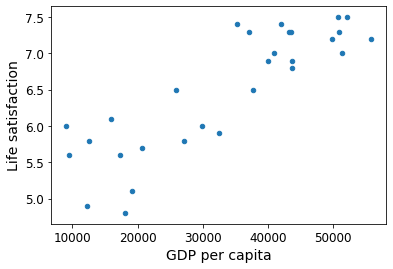

In [109]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


### Plot scatterplot and the regression function

In [110]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

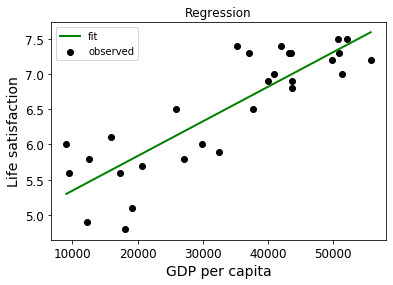

In [111]:
# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

In [112]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Model Evaluation Example

#### 1. Preparing X and Y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

#### 2. Splitting X and y into training and testing sets

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3. Linear regression in scikit-learn

In [114]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 4. Making predictions

In [115]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### 5. Computing the RMSE for our Sales predictions

In [116]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4198326061843324


### Assignment


###  Part 1: Explore insight of the data using other visualization tools

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select attributes (columns) you are interested (either US only or all data).

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(c) Draw scatter plots

(d) simple linear regression function with a scatter plot

In [117]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv')

df = df.replace(0,np.NaN)

print("-- mean --")
print(df.mean())


-- mean --
Lat                     3.684009e+01
Long_                  -8.520662e+01
Confirmed               9.742333e+03
Deaths                  4.077778e+02
Recovered               2.486630e+03
Active                  8.625948e+03
FIPS                    6.370175e+01
Incident_Rate           1.344983e+02
People_Tested           5.010521e+04
People_Hospitalized     1.882673e+03
Mortality_Rate          3.353530e+00
UID                     7.688581e+07
Testing_Rate            9.399562e+02
Hospitalization_Rate    1.436521e+01
dtype: float64


In [118]:
print("-- Median -- ")
print(df.median())


-- Median -- 
Lat                     3.906185e+01
Long_                  -8.794420e+01
Confirmed               2.303000e+03
Deaths                  9.100000e+01
Recovered               2.660000e+02
Active                  2.079500e+03
FIPS                    3.200000e+01
Incident_Rate           7.285659e+01
People_Tested           2.665150e+04
People_Hospitalized     4.370000e+02
Mortality_Rate          2.905239e+00
UID                     8.400003e+07
Testing_Rate            7.936144e+02
Hospitalization_Rate    1.266234e+01
dtype: float64


In [119]:
print("\n -- standard deviation --")
print(df.std())



 -- standard deviation --
Lat                     1.088704e+01
Long_                   4.975446e+01
Confirmed               2.629474e+04
Deaths                  1.309320e+03
Recovered               7.599322e+03
Active                  2.542415e+04
FIPS                    1.705272e+02
Incident_Rate           1.811227e+02
People_Tested           7.144243e+04
People_Hospitalized     6.122106e+03
Mortality_Rate          2.359981e+00
UID                     2.359629e+07
Testing_Rate            5.201140e+02
Hospitalization_Rate    6.474484e+00
dtype: float64


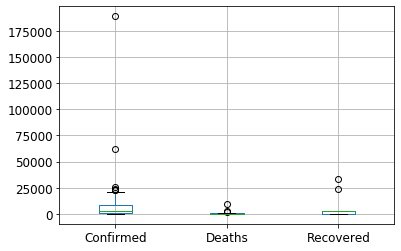

In [120]:
df.fillna(df.mean(), inplace=True)
df.boxplot(column=['Confirmed', 'Deaths', 'Recovered'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4EA41CF48>,
      dtype=object)

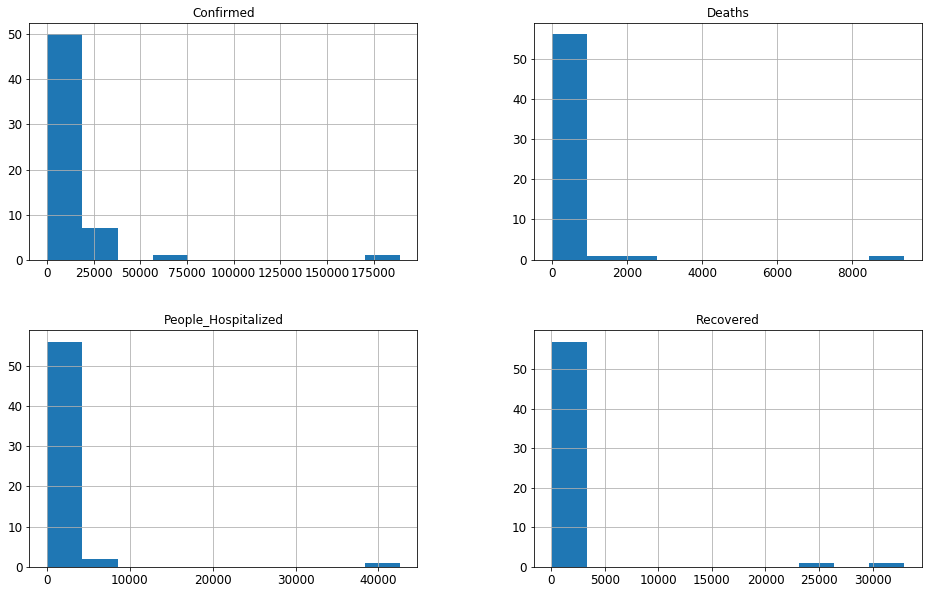

In [121]:
df.hist(figsize = (16,10),column=['Confirmed','Deaths','Recovered','People_Hospitalized'])

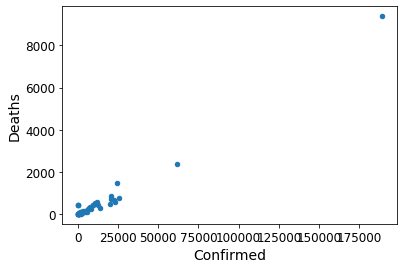

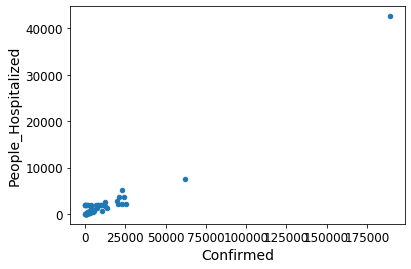

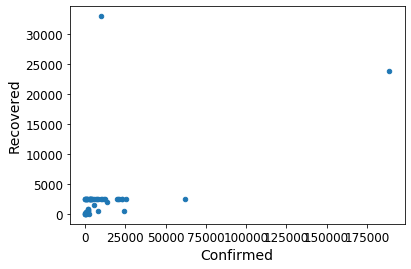

In [122]:

#Draw scatter plots
ax1 = df.plot.scatter(x= 'Confirmed', y='Deaths')
ax1 = df.plot.scatter(x= 'Confirmed', y='People_Hospitalized')
ax1 = df.plot.scatter(x='Confirmed', y='Recovered')

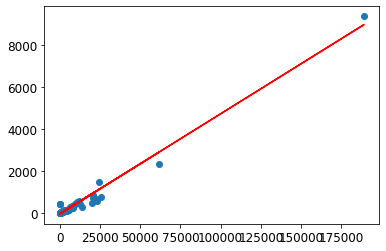

In [125]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['Confirmed'].values.reshape(-1, 1)
Y = df['Deaths'].values.reshape(-1, 1) 
regressor = LinearRegression()
regressor.fit(X,Y)
Y_pred = regressor.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

### Part 2: Write a summary of what you find from the data

The histograms and plots look quite strage, initially I thought they meant nothing. However, these show that cases in the extreme right are very far and few between. If we look at all 4 histograms their numbers almost overlap, from the plot we at least know that most infected are treated and there are cases of recovery although low. The amout of confirmed COVID cases in US alone is at minimum 10.000 according to the first histogram. It's a shame we can't reach a 1:1 ratio for confirmed and people_hospitalized but it's better than none. 